# Classificação de neuroimagens do estudo Haxby 2001 utilizando SVM

## Matheus Ávila - Bolsista de IC

## O que é SVM?

- SVM é uma abreviação para Support Vector Machine, que é um dos muitos classificadores disponíveis para implementar um algoritmo de aprendizagem de máquinas(Machine Learning)


## Esse classificador representa as entradas (inputs) em um plano cartesiano e separa esse mesmo espaço em dois estados: 

- Um lado possui instancias de entrada positivas (1)
- O outro possui instancias de entrada negativas (-1)



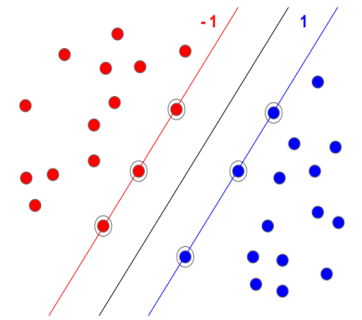

In [4]:
from IPython.display import Image 
Image(filename=( '/home/lsa/Downloads/Matheus/HAXBYpresentation/svmgraphic.png' ))     

# Uma breve descrição do problema

  O Estudo Haxby é basicamente uma série de respostas neurais de diferentes pacientes expostos a diferentes estímulos visuais, contendo imagens de: Gatos, Faces, Rostos, Casas entre outros.


# Como aplicamos esse classificador ao nosso problema?

 Nosso problema é constituído por:




- Um banco de dados contendo neuroimagens de respostas a estimulos visuais (dataset).


```python
from nilearn import datasets
haxby_dataset = datasets.fetch_haxby()
```

- Condições para classificação (labels).


```python
# Load behavioral info
behavioral = np.recfromcsv(haxby_dataset.session_target[0], delimiter=" ")
print (behavioral)

# Retrieve the experimental conditions, that we are going to use as
#prediction targets in the decoding
conditions = behavioral['labels']
print(conditions)
```

## Nosso classificador irá separar o plano cartesiano, já mencionado no slide 3, em 2 espaços, vamos tentar classificar apenas imagens de gatos e rostos para simplicidade do problema demonstrativo.


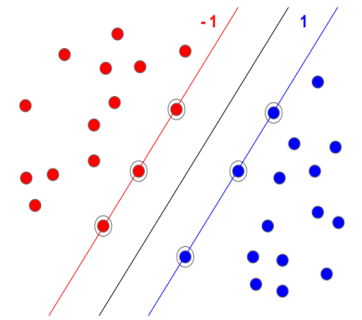

In [17]:
Image(filename=( '/home/lsa/Downloads/Matheus/HAXBYpresentation/svmgraphic.png' ))     

## Para fazer isso teremos que usar um método de feature selection e aplicá-lo tanto no dataset como nos labels. 


 Já que estamos trabalhando com um ambiente de classificação binário podemos usar uma simples função lógica OR.

```python
# To keep only data corresponding to faces or cats, we create a
# mask of the samples belonging to the condition
condition_mask = np.logical_or(conditions ==b'face', conditions ==b'cat')
```

# Após a aplicação da máscara, temos nosso dataset reduzido devido a implementação do feature extraction desejada. Podemos começar a construir de fato nosso SVC (Support Vector Classifier)


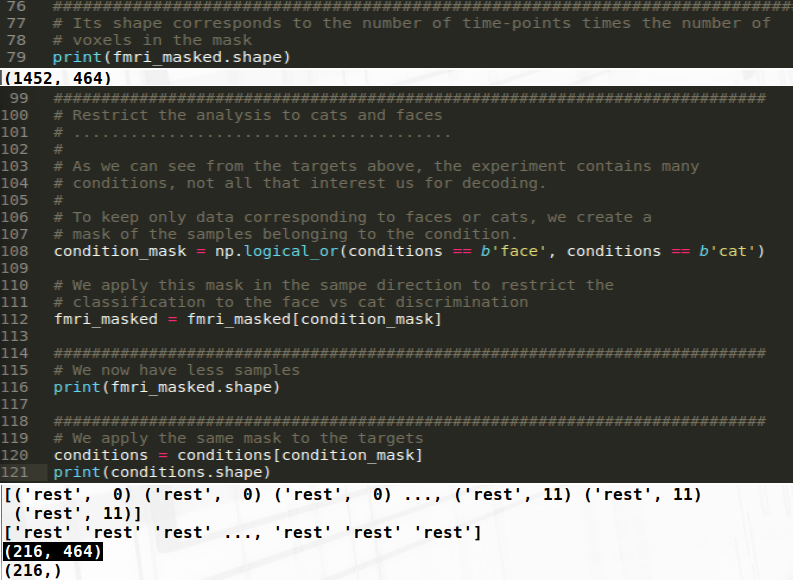

In [19]:
Image(filename=( '/home/lsa/Downloads/Matheus/HAXBYpresentation/pisofcode1.png' ))     

# Configurando o classificador

 Existem diversas bibliotecas prontas para implementação de diversas técnicas. Possuindo funções úteis e classificadores pré prontos. Sendo necessário apenas setar os parâmetros de modo que atenda a demanda do problema.



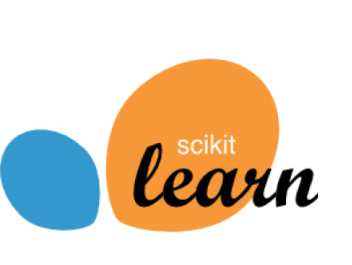

In [32]:
Image(filename=( '/home/lsa/Downloads/Matheus/HAXBYpresentation/365630.png' ))

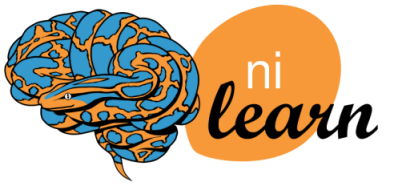

In [33]:
Image(filename=( '/home/lsa/Downloads/Matheus/HAXBYpresentation/nilearn-logo.png' ))

## Vamos usar a ML toolbox do scikit – learn no nosso dataset. Como classificador vamos usar um SVC simples com kernel linear


In [34]:
# We first create it
from sklearn.svm import SVC
svc = SVC(kernel='linear')
print(svc)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# Treinando o SVC

 primeiro passo agora é treinar o nosso classificador utilizando um método de cross validation com n = 5.

 Já existem ferramentas no toolbox do scikit que facilitam essa implementação.


## Uma delas é o método cross_val_score que retorna um array de valores flutuantes representando a acurácia do classificador pra cada “n - fold” treinado.

Com apenas uma linha de código podemos implementar o método, sendo “cv” o parâmetro que determina quantos “n - folds” serão utilizados

```python
cv_score = cross_val_score(svc, fmri_masked, conditions, cv=5)
print(cv_score)
```

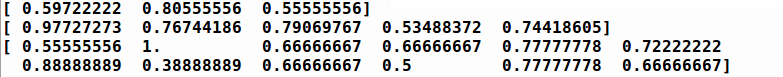

In [36]:
Image(filename=( '/home/lsa/Downloads/Matheus/HAXBYpresentation/cvscores.png' ))

# Também pode ser interessante retornar os pesos (*weights*) do modelo para inspeção. Podemos inclusive mostrar isso no formato de uma imagem nifti para melhor visualização de onde ocorrem as ativações cerebrais mais relevantes para classificação do problema.

Podemos implementar isso apenas com
```python
from nilearn.plotting import plot_stat_map, show
coef_ = svc.coef_
print(coef_) #Numpy array
# We turn it back into a Nifti image "inverting" what the NiftiMasker has done
coef_img = masker.inverse_transform(coef_)
#We can plot the weights, using the subject's anatomical as a background
plot_stat_map(coef_img, bg_img=haxby_dataset.anat[0],
              title="SVM weights", display_mode="yx")

show()
```

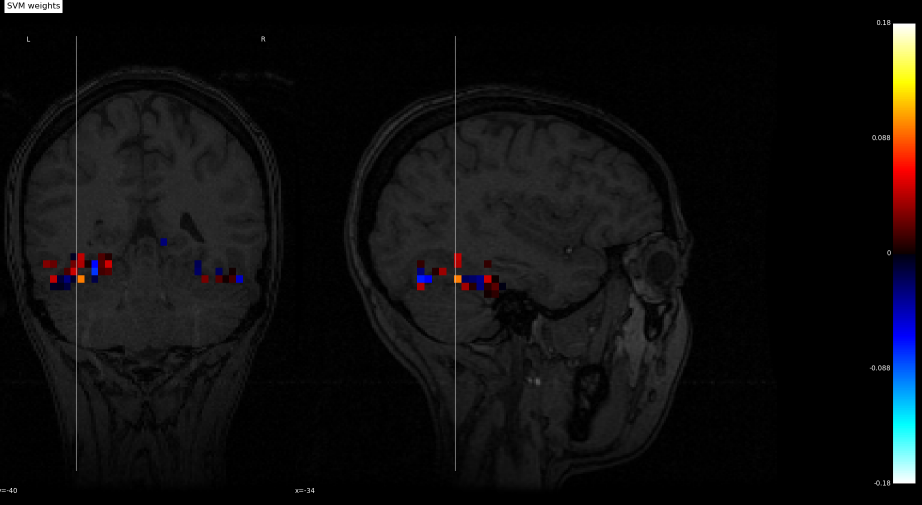

In [38]:
Image(filename=( '/home/lsa/Downloads/Matheus/HAXBYpresentation/svmweights.png' ))

# Conclusão

Com esse problema demonstrativo de machine learning com neuroimagens podemos concluir que a maior dificuldade, em primeira análise, se encontra na manipulação dos dados a serem usados pelo classificador.

Existem diversas outras formas de implementar os métodos descritos na apresentação. A escolha dos métodos e formas de implementação são relativos ao problema e ao programador.


# Obrigado pela atenção